In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
df=pd.read_csv('dataset cancer\\hmnist_28_28_L.csv')

In [5]:
df

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,...,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,...,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,...,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,...,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,...,210,197,172,190,195,193,181,147,88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,172,171,173,175,164,187,207,210,208,206,...,210,217,221,209,185,187,192,192,192,0
10011,2,34,108,116,114,119,131,139,139,145,...,173,169,168,168,143,138,83,23,3,0
10012,122,154,162,170,179,197,200,195,202,199,...,221,215,205,187,209,198,187,164,156,0
10013,137,143,141,139,147,152,155,152,155,159,...,172,171,175,183,177,170,169,166,170,0


In [6]:
df.isnull().sum().sum()

0

In [7]:
X=df.drop('label',axis=1).copy()
Y=df['label'].copy()

In [8]:
labels = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

In [9]:
X=X/255
X

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,0.662745,0.670588,0.666667,0.694118,0.709804,0.713725,0.709804,0.725490,0.760784,0.752941,...,0.690196,0.721569,0.729412,0.725490,0.705882,0.615686,0.549020,0.549020,0.623529,0.647059
1,0.074510,0.223529,0.411765,0.549020,0.584314,0.580392,0.564706,0.607843,0.666667,0.666667,...,0.709804,0.674510,0.686275,0.627451,0.564706,0.447059,0.349020,0.184314,0.070588,0.070588
2,0.607843,0.639216,0.631373,0.654902,0.654902,0.674510,0.607843,0.596078,0.647059,0.686275,...,0.635294,0.639216,0.698039,0.615686,0.650980,0.654902,0.580392,0.552941,0.533333,0.450980
3,0.098039,0.278431,0.454902,0.545098,0.533333,0.600000,0.580392,0.631373,0.674510,0.635294,...,0.556863,0.490196,0.529412,0.541176,0.537255,0.435294,0.278431,0.125490,0.062745,0.062745
4,0.505882,0.635294,0.709804,0.768627,0.803922,0.815686,0.803922,0.835294,0.882353,0.878431,...,0.827451,0.823529,0.772549,0.674510,0.745098,0.764706,0.756863,0.709804,0.576471,0.345098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.674510,0.670588,0.678431,0.686275,0.643137,0.733333,0.811765,0.823529,0.815686,0.807843,...,0.823529,0.823529,0.850980,0.866667,0.819608,0.725490,0.733333,0.752941,0.752941,0.752941
10011,0.007843,0.133333,0.423529,0.454902,0.447059,0.466667,0.513725,0.545098,0.545098,0.568627,...,0.721569,0.678431,0.662745,0.658824,0.658824,0.560784,0.541176,0.325490,0.090196,0.011765
10012,0.478431,0.603922,0.635294,0.666667,0.701961,0.772549,0.784314,0.764706,0.792157,0.780392,...,0.874510,0.866667,0.843137,0.803922,0.733333,0.819608,0.776471,0.733333,0.643137,0.611765
10013,0.537255,0.560784,0.552941,0.545098,0.576471,0.596078,0.607843,0.596078,0.607843,0.623529,...,0.698039,0.674510,0.670588,0.686275,0.717647,0.694118,0.666667,0.662745,0.650980,0.666667


In [10]:
X=np.array(X)
print(X.shape)

(10015, 784)


In [11]:
X=X.reshape(-1,28,28,1)
print(X.shape)

(10015, 28, 28, 1)


In [12]:
Y.value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [13]:
sample_data=pd.Series(list(zip(X,Y))).sample(9)
sample_x=np.stack(np.array(sample_data.apply(lambda x: x[0])))
sample_y=np.array(sample_data.apply(lambda x: x[1]))

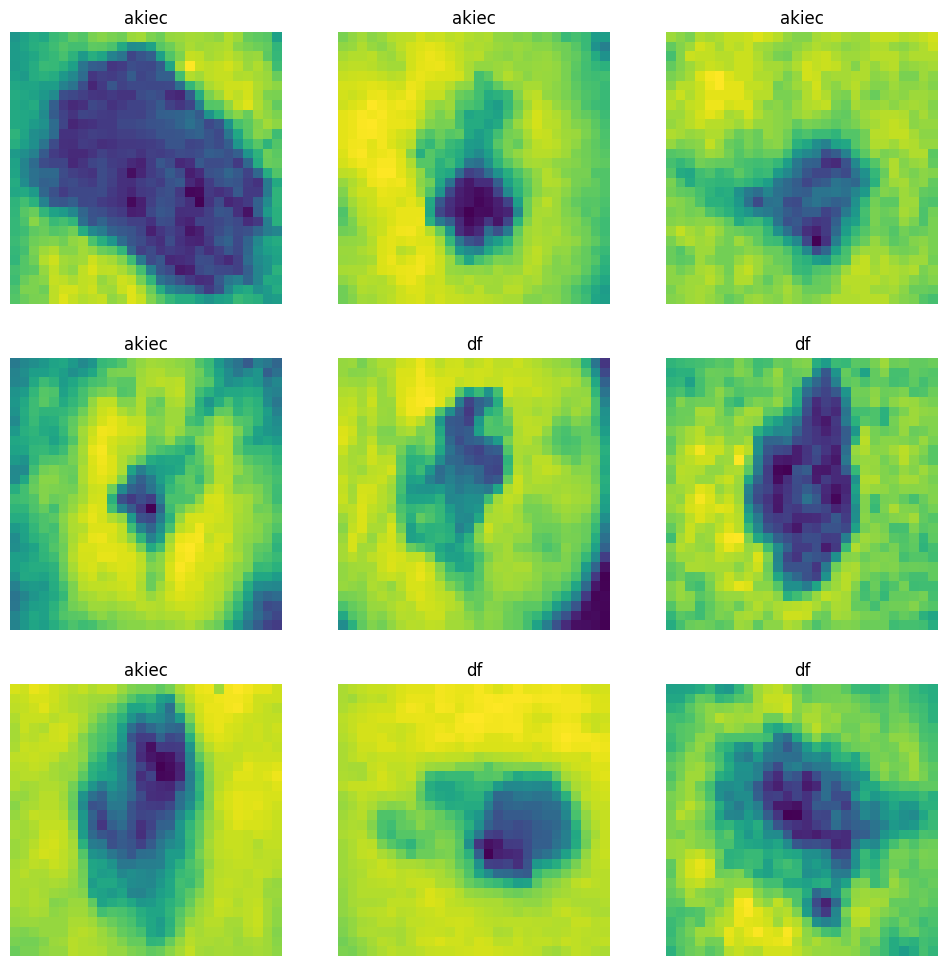

In [14]:
plt.figure(figsize=(12,12))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(np.squeeze(sample_x[i]))
    img_label=labels[sample_y[i]]
    plt.title(img_label)
    plt.axis("off")
    
plt.show()

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [108]:
inputs=tf.keras.Input(shape=(28,28,1), name='inp')

conv1=tf.keras.layers.Conv2D(filters=512,kernel_size=3,name='conv1')(inputs)
maxpool1=tf.keras.layers.MaxPooling2D(name='mp1')(conv1)

conv2=tf.keras.layers.Conv2D(filters=1024,kernel_size=3,name='conv2')(maxpool1)
maxpool2=tf.keras.layers.MaxPooling2D(name='mp2')(conv2)

conv3=tf.keras.layers.Conv2D(filters=2048,kernel_size=3,name='conv3')(maxpool2)
maxpool3=tf.keras.layers.MaxPooling2D(name='mp3')(conv3)

# conv4=tf.keras.layers.Conv2D(filters=128,kernel_size=3,name='conv4')(maxpool3)
# maxpool4=tf.keras.layers.MaxPooling2D(name='mp4')(conv4)

# conv5=tf.keras.layers.Conv2D(flters=256,kernel_size=3,name='conv5')(maxpool4)
# maxpool5=tf.keras.layers.MaxPooling2D(name='mp5')(conv5)

avgpool=tf.keras.layers.GlobalAveragePooling2D(name='avgpool')(maxpool3)

outputs=tf.keras.layers.Dense(7,activation='softmax',name='out')(avgpool)

model=tf.keras.Model(inputs=inputs,outputs=outputs)



In [109]:
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inp (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 26, 26, 512)       5120      
                                                                 
 mp1 (MaxPooling2D)          (None, 13, 13, 512)       0         
                                                                 
 conv2 (Conv2D)              (None, 11, 11, 1024)      4719616   
                                                                 
 mp2 (MaxPooling2D)          (None, 5, 5, 1024)        0         
                                                                 
 conv3 (Conv2D)              (None, 3, 3, 2048)        18876416  
                                                                 
 mp3 (MaxPooling2D)          (None, 1, 1, 2048)        0  

In [65]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [68]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size=64
epochs=70

history=model.fit(X_train,Y_train,validation_split=0.2,batch_size=batch_size,epochs=epochs,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)])

Epoch 1/70
88/88 [==============================] - 26s 293ms/step - loss: 1.1394 - accuracy: 0.6658 - val_loss: 0.9695 - val_accuracy: 0.6619
Epoch 2/70
88/88 [==============================] - 26s 291ms/step - loss: 0.9046 - accuracy: 0.6940 - val_loss: 0.9842 - val_accuracy: 0.6740
Epoch 3/70
88/88 [==============================] - 26s 292ms/step - loss: 0.8791 - accuracy: 0.6965 - val_loss: 0.9843 - val_accuracy: 0.6776
Epoch 4/70
88/88 [==============================] - 26s 292ms/step - loss: 0.8734 - accuracy: 0.7017 - val_loss: 0.9119 - val_accuracy: 0.6797
Epoch 5/70
88/88 [==============================] - 26s 291ms/step - loss: 0.8544 - accuracy: 0.7067 - val_loss: 0.9180 - val_accuracy: 0.6869
Epoch 6/70
88/88 [==============================] - 26s 292ms/step - loss: 0.8120 - accuracy: 0.7181 - val_loss: 1.1086 - val_accuracy: 0.6790
Epoch 7/70
88/88 [==============================] - 26s 292ms/step - loss: 0.7888 - accuracy: 0.7291 - val_loss: 0.9981 - val_accuracy: 0.6719

In [71]:
m_acc=model.evaluate(X_test,Y_test,verbose=0)[1]
print('Test accuracy: {:.3f}%'.format(m_acc*100))

Test accuracy: 67.953%


In [72]:
model.save('detector.h5')

In [89]:
y_hat=model.predict(X_test)

In [90]:
y_hat

array([[1.48249222e-02, 2.60999277e-02, 1.40033543e-01, ...,
        7.58731663e-01, 1.04034347e-02, 4.86262999e-02],
       [3.60134915e-02, 9.19149816e-02, 1.99117884e-01, ...,
        5.41968107e-01, 1.10498015e-02, 7.04311356e-02],
       [3.04692541e-04, 3.21849104e-04, 3.15294117e-02, ...,
        9.12643135e-01, 1.22947134e-02, 4.26312909e-02],
       ...,
       [2.17639469e-03, 3.01449513e-03, 6.53100163e-02, ...,
        7.74913669e-01, 4.27962542e-02, 1.11356162e-01],
       [2.00462667e-03, 2.03570295e-02, 5.52585907e-02, ...,
        8.84533405e-01, 1.26424134e-02, 2.17807535e-02],
       [4.01622131e-02, 4.46652658e-02, 1.01004630e-01, ...,
        7.45477736e-01, 6.98550791e-03, 6.03723265e-02]], dtype=float32)

[[0.03893386 0.26837552 0.22717795 0.07055109 0.36978415 0.00413377
  0.02104364]]
4


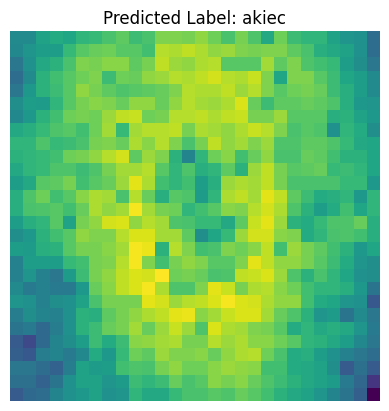

In [105]:
image = X_test[819]
prediction = model.predict(np.expand_dims(image, axis=0))
print(prediction)
predicted_class = np.argmax(prediction)
print(predicted_class)
predicted_label = labels[predicted_class]

plt.imshow(np.squeeze(image))
plt.title("Predicted Label: " + predicted_label)
plt.axis("off")
plt.show()
